#Naive Bayes classifier implementation on the 20newsgroups dataset

In this notebook I have tried to implement the Naive Bayes calculator using the 20newsgroups dataset taken from sklearn.

In [7]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score


The dataset is loaded and the train and test data are split

In [8]:
data = fetch_20newsgroups()
text_categories = data.target_names
train_data = fetch_20newsgroups(subset="train", categories=text_categories)
test_data = fetch_20newsgroups(subset="test", categories=text_categories)

The number of classes and the number of training and test examples, respectively, are displayed.

In [9]:
print(" Numero di classi {}".format(len(text_categories)))
print(" Training set {}".format(len(train_data.data)))
print(" Test set {}".format(len(test_data.data)))

 Numero di classi 20
 Training set 11314
 Test set 7532


The make_pipeline method initializes the Naive Bayes model using the TF-IDF conversion of text documents.

In [10]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train_data.data, train_data.target)
predicted_categories = model.predict(test_data.data)

In [11]:
print(np.array(test_data.target_names)[predicted_categories])

['rec.autos' 'sci.crypt' 'alt.atheism' ... 'rec.sport.baseball'
 'comp.sys.ibm.pc.hardware' 'soc.religion.christian']


We plot the confusion matrix and calculate the accuracy of the model.
(To plot the various document category names I used the sns library)

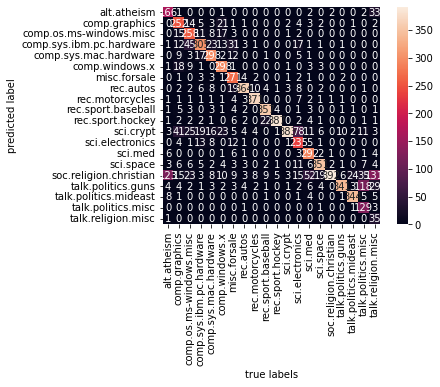

The accuracy is 0.7738980350504514


In [12]:
mat = confusion_matrix(test_data.target, predicted_categories)

sns.heatmap(mat.T, square = True, annot=True, fmt = "d", xticklabels=train_data.target_names,yticklabels=train_data.target_names)
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()
print("The accuracy is {}".format(accuracy_score(test_data.target, predicted_categories)))

Now that the model is trained, through the prediction function we can predict a dataset text document from any phrase or word we enter.

As we can see at the word "Apple" the model gives us the category "comp.sys.mac.hardware".

In [13]:
def prediction(what, model):
    all_categories_names = np.array(data.target_names)
    prediction = model.predict([what])
    return all_categories_names[prediction]

In [14]:
what = "Apple"
print(prediction(what, model))


['comp.sys.mac.hardware']
